In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=fi---------fi-tso-0003entrytransmission,fi---------fi-tso-0003entrytransmissionee-lv------,fi---------fi-tso-0003exittransmissionee-lv------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                   id  dataSet dataSetLabel  \
0   1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
1   1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
2   1AggregatesFIFI---------FI-TSO-0003exitTransmi...        1   Aggregates   
3   1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
4   1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
..                                                ...      ...          ...   
88  1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
89  1AggregatesFIFI---------FI-TSO-0003exitTransmi...        1   Aggregates   
90  1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
91  1AggregatesFIFI---------FI-TSO-0003entryTransm...        1   Aggregates   
92  1AggregatesFIFI---------FI-TSO-0003exitTransmi...        1   Aggregates   

        indicator periodType        periodFrom     

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

   directionKey  day     value
0         entry    2  68646837
1         entry    2         0
2          exit    2  17498889
3         entry    3  72059144
4         entry    3         0
..          ...  ...       ...
88        entry   31         0
89         exit   31  20863404
90        entry    1  44891908
91        entry    1   2093480
92         exit    1         0

[93 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                       value
day directionKey            
1   entry         23492694.0
    exit                 0.0
2   entry         34323418.5
    exit          17498889.0
3   entry         36029572.0
...                      ...
29  exit           5999921.0
30  entry         45219402.0
    exit          20882964.0
31  entry         45735005.5
    exit          20863404.0

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

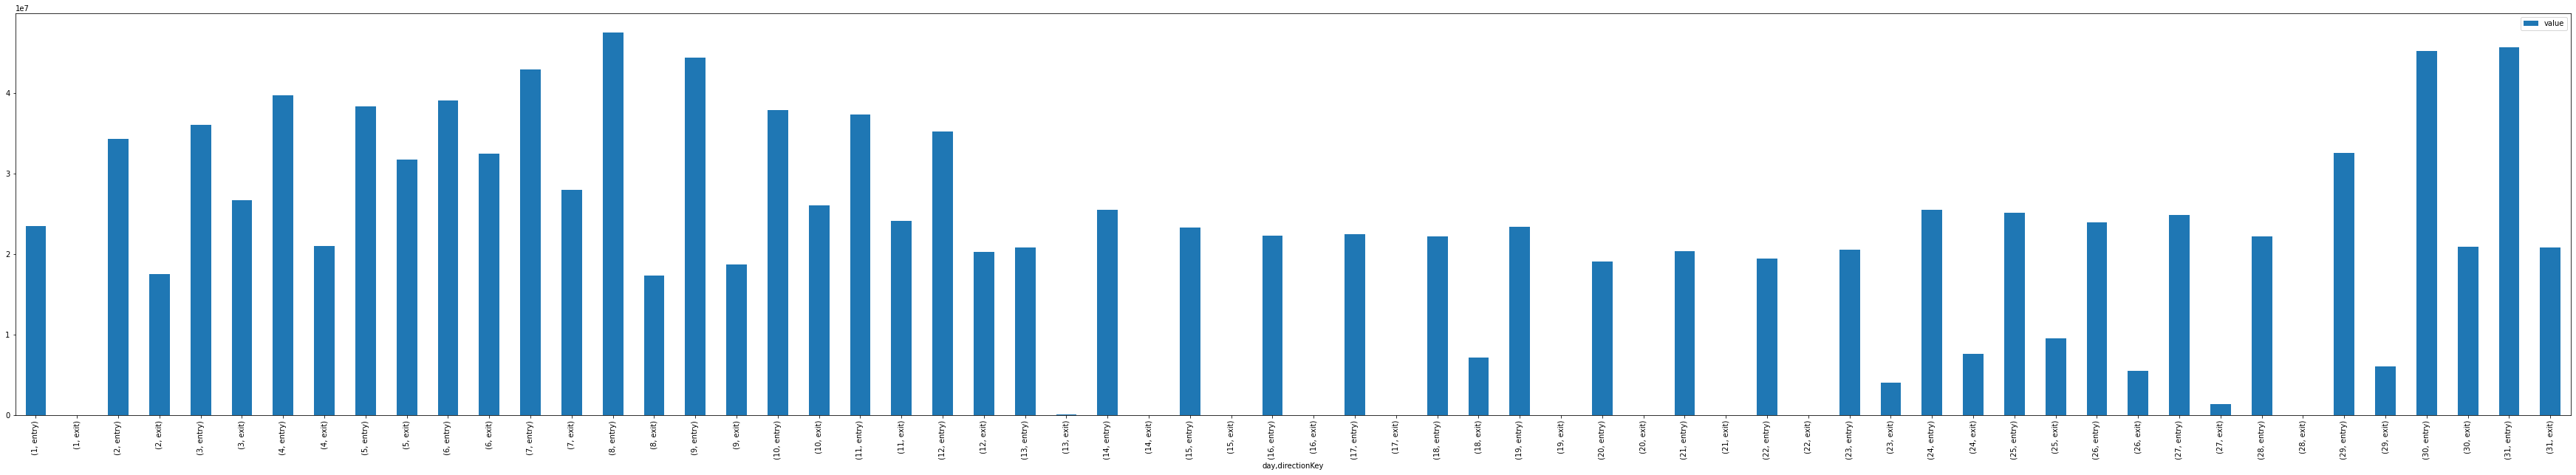

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))